In [1]:
import numpy as np
import pandas as pd
#最大表示列数の指定（ここでは50列を指定）
pd.set_option('display.max_columns', 50)

In [2]:
race_df = pd.read_csv("./csv/race-2008.csv", sep=",")
horse_df = pd.read_csv("./csv/horse-2008.csv", sep=",")

In [3]:
race_df = pd.read_csv("./csv/race-2008.csv", sep=",")
horse_df = pd.read_csv("./csv/horse-2008.csv", sep=",")
for year in range(2009, 2020):
    race_tmp_df = pd.read_csv("./csv/race-"+str(year)+".csv", sep=",")
    horse_tmp_df = pd.read_csv("./csv/horse-"+str(year)+".csv", sep=",")
    race_df = pd.concat([race_df, race_tmp_df], axis=0)
    horse_df = pd.concat([horse_df, horse_tmp_df], axis=0)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 元データの確認

In [4]:
# race_id単位で重複したデータが存在しないか確認
print(len(race_df) == len(race_df['race_id'].unique()))
print(race_df.shape)
race_df.tail(2)

True
(41141, 28)


,race_id,race_round,race_title,race_course,weather,ground_status,time,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3
3151,201907040403,3 R,3歳以上1勝クラス,ダ左1200m,天候 : 晴,ダート : 良,発走 : 10:55,2019年12月8日,4回中京4日目,15,2,2,3,4,8,15,430,150,110,330,220,300,190,"1,690",580,820,"2,600","11,610"
3152,201906050410,10 R,常総ステークス,芝右1800m,天候 : 晴,芝 : 良,発走 : 14:40\n\n過去の常総ステークス,2019年12月8日,5回中山4日目,10,1,1,5,5,7,7,570,170,700,120,"15,010","16,440","3,950",320,"1,540","29,400","7,930","85,020"


In [5]:
# 出走馬数の確認
race_df["total_horse_number"].value_counts()

16    15136
15     4703
14     4192
18     3742
13     3334
12     3084
11     2225
10     1778
9      1219
8       708
17      663
7       251
6        82
5        24
Name: total_horse_number, dtype: int64

In [6]:
print(horse_df.shape)
horse_df.head(2)

(591645, 20)


,race_id,rank,frame_number,horse_number,horse_id,horse_name,sex_and_age,burden_weight,rider_id,goal_time,goal_time_dif,time_value,half_way_rank,last_time,odds,popular,horse_weight,tame_time,tamer_id,owner_id
0,200808010109,1,8,15,2003106135,レキシントンシチー,牡5,57.0,666,1:10.8,NaN,\n\n**\n\n,1-1,36.1,2.5,1.0,498(+2),\n\n,429,321800
1,200808010109,2,2,3,2003103517,カシノエスケイプ,牝5,55.0,1111,1:11.1,2,\n\n**\n\n,10-10,35.4,24.0,8.0,502(+2),\n\n,398,514009


## raceデータの整形

In [7]:
race_df.head(1)

,race_id,race_round,race_title,race_course,weather,ground_status,time,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3
0,200808010109,9 R,初夢ステークス,ダ右1200m,天候 : 晴,ダート : 良,発走 : 14:30\n\n過去の初夢ステークス,2008年1月5日,1回京都1日目,16,8,15,2,3,7,13,250,120,410,140,"1,880","2,550",930,230,850,"3,320","2,330","13,400"


In [8]:
horse_df[horse_df['race_id'] == 200805010811]

,race_id,rank,frame_number,horse_number,horse_id,horse_name,sex_and_age,burden_weight,rider_id,goal_time,goal_time_dif,time_value,half_way_rank,last_time,odds,popular,horse_weight,tame_time,tamer_id,owner_id
4533,200805010811,1,8,15,2002100877,ヴァーミリアン,牡6,57.0,666,1:35.3,NaN,\n\n**\n\n,5-3,35.9,2.4,1.0,520(+7),\n\n,1022,226800
4534,200805010811,2,5,10,2000107570,ブルーコンコルド,牡8,57.0,732,1:35.6,1.3/4,\n\n**\n\n,4-3,36.2,19.4,7.0,508(+1),\n\n,1040,188800
4535,200805010811,3,8,16,2002104665,ワイルドワンダー,牡6,57.0,5203,1:35.9,2,\n\n**\n\n,8-7,36.3,5.1,3.0,452(+4),\n\n,1067,909006
4536,200805010811,4,4,8,2004105013,ロングプライド,牡4,57.0,432,1:36.1,1.1/4,\n\n**\n\n,11-10,36.3,10.3,4.0,516(-6),\n\n,350,602002
4537,200805010811,5,6,12,1999106730,リミットレスビッド,牡9,57.0,663,1:36.2,1/2,\n\n**\n\n,8-7,36.6,128.6,14.0,516(0),\n\n,425,415800
4538,200805010811,6,3,5,2000101528,クワイエットデイ,牡8,57.0,685,1:36.3,3/4,\n\n**\n\n,11-10,36.5,35.7,9.0,494(-2),\n\n,308,226800
4539,200805010811,7,7,14,2002100600,デアリングハート,牝6,55.0,705,1:36.5,1.1/4,\n\n**\n\n,2-2,37.3,36.9,10.0,424(+7),\n\n,1055,415800
4540,200805010811,8,5,9,2002102252,メイショウトウコン,牡6,57.0,1026,1:37.0,3,\n\n**\n\n,13-12,37.0,14.2,5.0,462(0),\n\n,340,523005
4541,200805010811,9,4,7,2004104693,ドラゴンファイヤー,牡4,57.0,945,1:37.1,クビ,\n\n**\n\n,14-14,36.8,14.8,6.0,460(-14),\n\n,1067,208008
4542,200805010811,10,2,3,2004105545,アンパサンド,牡4,57.0,5386,1:37.3,1.1/4,\n\n**\n\n,5-7,37.7,118.9,13.0,478(-10),\n\n,5392,169030


### race_id
そのままでOK

In [9]:
# 一応確認
race_df["race_id"].dtypes

dtype('int64')

### race_round
余分な空白とRを取り除く

In [10]:
race_df["race_round"].dtypes

dtype('O')

In [11]:
race_df['race_round'].unique()

array(['9 R', '8 R', '7 R', '12 R', '2 R', '10 R', '5 R', '6 R', '1 R',
       '3 R', '11 R', '4 R', '      2 R\n      '], dtype=object)

In [12]:
race_df['race_round'] = race_df['race_round'].str.strip('R \n')

In [13]:
race_df['race_round'].unique()

array(['9', '8', '7', '12', '2', '10', '5', '6', '1', '3', '11', '4'],
      dtype=object)

In [14]:
race_df['race_round'] = race_df['race_round'].astype(int)
race_df["race_round"].dtypes

dtype('int64')

### race_title
いらないので削除

In [15]:
# もともとのカラムは不要なので削除
# race_df.drop(['race_title'], axis=1, inplace=True)

### race_course
「ダ右1200m」などであれば、ダート・右回り・1200に分割して、それぞれ別のカラムにする。

新たに4つのカラムを追加
- 障害コースか？
- 地面のタイプは何か？
- 右回り・左回り・直線か？
- 距離は？

In [16]:
race_df["race_course"].unique()

array(['ダ右1200m', 'ダ右1800m', 'ダ右1700m', '芝右 外1600m', '芝右 外2200m',
       '芝右 外1200m', '芝右2000m', 'ダ右1400m', '芝右 外1800m', '芝右1400m',
       'ダ右1000m', '芝右1600m', '障芝 ダート2880m', '芝右 外2400m', '芝右1800m',
       '芝右1200m', 'ダ右2400m', '障芝 ダート3190m', '障芝 ダート3200m', '芝右2600m',
       'ダ右2500m', '障芝 ダート2930m', '芝右 外1400m', '芝右2500m', '芝右 外3000m',
       '芝左2000m', '芝左1400m', '芝左1800m', 'ダ左1300m', 'ダ左1600m', '芝左1600m',
       '芝左2400m', '芝左3400m', 'ダ右1900m', '障芝 ダート3300m', 'ダ左1400m',
       'ダ左2100m', '障芝 ダート3000m', 'ダ左2400m', '障芝 ダート3790m', 'ダ左1700m',
       '芝左1200m', '芝右2200m', 'ダ左1000m', 'ダ左2300m', 'ダ右2000m',
       '障芝 ダート2970m', '芝左2500m', '障芝 外3350m', '障芝 ダート3110m', '芝右3000m',
       '障芝3900m', 'ダ右1150m', '障芝 ダート2910m', '障芝 ダート3170m', '芝左2300m',
       '障芝 外4250m', '障芝3140m', 'ダ左1200m', 'ダ左1800m', '芝左2200m',
       '芝左 外2000m', '芝左 外1600m', '芝直線1000m', '芝左 外1800m', '障芝 左2800m',
       '芝右 外3200m', '障芝 ダート3100m', '障芝 内-外3170m', '芝右1700m', '芝右1000m',
       '障芝2750m', '障芝 左3370m', '障芝3300m'

In [17]:
# 正規表現で取得

# 障害か、地面のタイプは何か、左か、右か、直線か、
obstacle = race_df["race_course"].str.extract('(障)', expand=True)
ground_type = race_df["race_course"].str.extract('(ダ|芝)', expand=True)
is_left_right_straight = race_df["race_course"].str.extract('(左|右|直線)', expand=True)
distance = race_df["race_course"].str.extract('(\d+)m', expand=True)

obstacle.columns ={"is_obstacle"}
ground_type.columns ={"ground_type"}
is_left_right_straight.columns = {"is_left_right_straight"}
distance.columns = {"distance"}

race_df = pd.concat([race_df, obstacle], axis=1)
race_df = pd.concat([race_df, ground_type], axis=1)
race_df = pd.concat([race_df, is_left_right_straight], axis=1)
race_df = pd.concat([race_df, distance], axis=1)

In [18]:
# 'is_obstacle' 列の '障芝' を1に置き換え、Nanに0埋め
race_df['is_obstacle'] = race_df['is_obstacle'].replace('障', 1)
race_df.fillna(value={'is_obstacle': 0}, inplace=True)

In [19]:
print("is_obstacle:", race_df["is_obstacle"].unique())
print("ground_type:", race_df["ground_type"].unique())
print("is_left_right_straight:", race_df["is_left_right_straight"].unique())
print("distance isnull sum:", race_df["distance"].isnull().sum())

is_obstacle: [0. 1.]
ground_type: ['ダ' '芝']
is_left_right_straight: ['右' nan '左' '直線']
distance isnull sum: 0


In [20]:
# もともとのカラムは不要なので削除
race_df.drop(['race_course'], axis=1, inplace=True)

In [21]:
race_df["distance"] = race_df["distance"].astype(int)

### weather
そのままone_hotエンコーディングしてデータを食わせても良さそうだが...

余分な文字列を取り除く。

また、少雨よりも雨が強いはず、小雪よりも雪が強いはず。これらの単純な雨量は別のデータを取ってこないと分からないが、大小関係は情報として入れられるはず。

In [22]:
race_df["weather"].unique()

array(['天候 : 晴', '天候 : 雨', '天候 : 曇', '天候 : 小雨', '天候 : 小雪', '天候 : 雪'],
      dtype=object)

In [23]:
race_df['weather'] = race_df['weather'].str.strip('天候 :')

In [24]:
race_df["weather"].unique()

array(['晴', '雨', '曇', '小雨', '小雪', '雪'], dtype=object)

In [25]:
weather_rain = race_df["weather"].str.extract('(小雨|雨)', expand=True)
weather_snow = race_df["weather"].str.extract('(小雪|雪)', expand=True)
weather_rain.columns ={"weather_rain"}
weather_snow.columns ={"weather_snow"}
race_df = pd.concat([race_df, weather_rain], axis=1)
race_df = pd.concat([race_df, weather_snow], axis=1)

race_df.fillna(value={'weather_rain': 0}, inplace=True)
race_df['weather_rain'] = race_df['weather_rain'].replace('小雨', 1)
race_df['weather_rain'] = race_df['weather_rain'].replace('雨', 2)
race_df.fillna(value={'weather_snow': 0}, inplace=True)
race_df['weather_snow'] = race_df['weather_snow'].replace('小雪', 1)
race_df['weather_snow'] = race_df['weather_snow'].replace('雪', 2)

In [26]:
print("weather_rain:", race_df["weather_rain"].value_counts())
print("weather_snow:", race_df["weather_snow"].value_counts())

weather_rain: 0    37593
2     2094
1     1454
Name: weather_rain, dtype: int64
weather_snow: 0    41073
1       49
2       19
Name: weather_snow, dtype: int64


### ground_status
芝かダートかは既に別カラムにあるので、状態を見る。
大小関係があるので数値として。

In [27]:
race_df["ground_status"].unique()

array(['ダート : 良', 'ダート : 不良', '芝 : 良', '芝 : 重', 'ダート : 稍重', '芝 : 稍重',
       '芝 : 良\xa0\xa0ダート : 良', '芝 : 不良', 'ダート : 重',
       '芝 : 稍重\xa0\xa0ダート : 重', '芝 : 良\xa0\xa0ダート : 稍重',
       '芝 : 良\xa0\xa0ダート : 不良', '芝 : 重\xa0\xa0ダート : 不良',
       '芝 : 稍重\xa0\xa0ダート : 稍重', '芝 : 稍重\xa0\xa0ダート : 不良',
       '芝 : 重\xa0\xa0ダート : 重', '芝 : 良\xa0\xa0ダート : 重',
       '芝 : 不良\xa0\xa0ダート : 不良'], dtype=object)

In [28]:
race_df['ground_status'] = race_df['ground_status'].replace('.*(稍重).*', 4,regex=True)
race_df['ground_status'] = race_df['ground_status'].replace('.*(重).*', 3,regex=True)
race_df['ground_status'] = race_df['ground_status'].replace('.*(不良).*', 2,regex=True)
race_df['ground_status'] = race_df['ground_status'].replace('.*(良).*', 1,regex=True)


In [29]:
print("ground_status:", race_df["ground_status"].value_counts())

ground_status: 1    29521
4     6543
3     3361
2     1716
Name: ground_status, dtype: int64


### time と dateをあわせてdatetimeに

In [30]:
race_df["time"] = race_df["time"].str.replace('発走 : (\d\d):(\d\d)(.|\n)*', r'\1時\2分')

In [31]:
race_df["date"] = race_df["date"] + race_df["time"]

In [32]:
race_df["date"] = pd.to_datetime(race_df['date'], format='%Y年%m月%d日%H時%M分')

In [33]:
# もともとのtimeは不要なので削除
race_df.drop(['time'], axis=1, inplace=True)

In [34]:
print(race_df["date"].dtype)
print("date isnull sum:", race_df["date"].isnull().sum())

datetime64[ns]
date isnull sum: 0


### where_racecourse
例:1回小倉3日目 の中から小倉を取り出す

In [35]:
race_df["where_racecourse"] = race_df["where_racecourse"].str.replace('\d*回(..)\d*日目', r'\1')


In [38]:
# 確認
race_df["where_racecourse"].unique()

array(['京都', '中山', '小倉', '東京', '阪神', '中京', '福島', '新潟', '函館', '札幌'],
      dtype=object)

###  馬の数や順位
- total_horse_number                 int64
- frame_number_first                 int64
- horse_number_first                 int64
- frame_number_second                int64
- horse_number_second                int64
- frame_number_third                 int64
- horse_number_third                 int64

これらはそのままでOK

### オッズから余分な「,」を除く
- tansyo                            object
- hukuren_first                     object
- hukuren_second                    object
- hukuren_third                     object
- renhuku3                          object
- rentan3                           object

数値と文字列が混在しているので面倒
```
race_df['tansyo'] = race_df['tansyo'].str.strip(',')
```
などとしてもだめ

In [39]:
race_df.columns

Index(['race_id', 'race_round', 'race_title', 'weather', 'ground_status',
       'date', 'where_racecourse', 'total_horse_number', 'frame_number_first',
       'horse_number_first', 'frame_number_second', 'horse_number_second',
       'frame_number_third', 'horse_number_third', 'tansyo', 'hukusyo_first',
       'hukusyo_second', 'hukusyo_third', 'wakuren', 'umaren', 'wide_1_2',
       'wide_1_3', 'wide_2_3', 'umatan', 'renhuku3', 'rentan3', 'is_obstacle',
       'ground_type', 'is_left_right_straight', 'distance', 'weather_rain',
       'weather_snow'],
      dtype='object')

In [40]:
race_df['tansyo'] = race_df['tansyo'].apply(lambda x: int(x.replace(",", "")) if type(x) is str else int(x))
race_df['hukusyo_first'] = race_df['hukusyo_first'].apply(lambda x: int(x.replace(",", "")) if type(x) is str else int(x))
race_df['hukusyo_second'] = race_df['hukusyo_second'].apply(lambda x: int(x.replace(",", "")) if type(x) is str else int(x))
race_df['hukusyo_third'] = race_df['hukusyo_third'].apply(lambda x: int(x.replace(",", "")) if type(x) is str else int(x))
race_df['wakuren'] = race_df['wakuren'].apply(lambda x: int(x.replace(",", "")) if type(x) is str else int(x))
race_df['umaren'] = race_df['umaren'].apply(lambda x: int(x.replace(",", "")) if type(x) is str else int(x))
race_df['wide_1_2'] = race_df['wide_1_2'].apply(lambda x: int(x.replace(",", "")) if type(x) is str else int(x))
race_df['wide_1_3'] = race_df['wide_1_3'].apply(lambda x: int(x.replace(",", "")) if type(x) is str else int(x))
race_df['wide_2_3'] = race_df['wide_2_3'].apply(lambda x: int(x.replace(",", "")) if type(x) is str else int(x))
race_df['umatan'] = race_df['umatan'].apply(lambda x: int(x.replace(",", "")) if type(x) is str else int(x))
race_df['renhuku3'] = race_df['renhuku3'].apply(lambda x: int(x.replace(",", "")) if type(x) is str else int(x))
race_df['rentan3'] = race_df['rentan3'].apply(lambda x: int(x.replace(",", "")) if type(x) is str else int(x))


In [41]:
race_df[race_df['race_id']==200808010709]

,race_id,race_round,race_title,weather,ground_status,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,is_obstacle,ground_type,is_left_right_straight,distance,weather_rain,weather_snow
90,200808010709,9,若駒ステークス,曇,1,2008-01-26 14:35:00,京都,9,3,3,8,8,2,2,360270,190,150,110,1760,1640,510,270,200,17101650,1040,41503910,0.0,芝,右,2000,0,0


In [42]:
# 確認
race_df['race_id'] = race_df['race_id'].astype(str)
#race_df['race_title'] = race_df['race_title'].astype(str)
print('dataframeの各列のデータ型を確認==>\n', race_df.dtypes)


race_df.head(1)

dataframeの各列のデータ型を確認==>
 race_id                           object
race_round                         int64
race_title                        object
weather                           object
ground_status                      int64
date                      datetime64[ns]
where_racecourse                  object
total_horse_number                 int64
frame_number_first                 int64
horse_number_first                 int64
frame_number_second                int64
horse_number_second                int64
frame_number_third                 int64
horse_number_third                 int64
tansyo                             int64
hukusyo_first                      int64
hukusyo_second                     int64
hukusyo_third                      int64
wakuren                            int64
umaren                             int64
wide_1_2                           int64
wide_1_3                           int64
wide_2_3                           int64
umatan                          

,race_id,race_round,race_title,weather,ground_status,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,is_obstacle,ground_type,is_left_right_straight,distance,weather_rain,weather_snow
0,200808010109,9,初夢ステークス,晴,1,2008-01-05 14:30:00,京都,16,8,15,2,3,7,13,250,120,410,140,1880,2550,930,230,850,3320,2330,13400,0.0,ダ,右,1200,0,0


### race dataの保存

In [43]:
race_df.to_csv("csv/cleaned_race_data.csv", index=False )

## horse data の整形

In [44]:
print(horse_df.shape)
print(horse_df.dtypes)
horse_df['race_id'] = horse_df['race_id'].astype(str)
horse_df['horse_id'] = horse_df['horse_id'].astype(str)
horse_df['tamer_id'] = horse_df['tamer_id'].astype(str)
horse_df['owner_id'] = horse_df['owner_id'].astype(str)
horse_df['rider_id'] = horse_df['rider_id'].astype(str)

horse_df.head(2)

(591645, 20)
race_id            int64
rank              object
frame_number       int64
horse_number       int64
horse_id           int64
horse_name        object
sex_and_age       object
burden_weight    float64
rider_id           int64
goal_time         object
goal_time_dif     object
time_value        object
half_way_rank     object
last_time        float64
odds              object
popular          float64
horse_weight      object
tame_time         object
tamer_id           int64
owner_id          object
dtype: object


,race_id,rank,frame_number,horse_number,horse_id,horse_name,sex_and_age,burden_weight,rider_id,goal_time,goal_time_dif,time_value,half_way_rank,last_time,odds,popular,horse_weight,tame_time,tamer_id,owner_id
0,200808010109,1,8,15,2003106135,レキシントンシチー,牡5,57.0,666,1:10.8,NaN,\n\n**\n\n,1-1,36.1,2.5,1.0,498(+2),\n\n,429,321800
1,200808010109,2,2,3,2003103517,カシノエスケイプ,牝5,55.0,1111,1:11.1,2,\n\n**\n\n,10-10,35.4,24.0,8.0,502(+2),\n\n,398,514009


In [45]:
# 何かとデータ分析で便利なので、レース日時情報をmerge
race_tmp_df = race_df[["race_id", "date"]]
horse_df = pd.merge(horse_df, race_tmp_df, on='race_id')
horse_df.head()

,race_id,rank,frame_number,horse_number,horse_id,horse_name,sex_and_age,burden_weight,rider_id,goal_time,goal_time_dif,time_value,half_way_rank,last_time,odds,popular,horse_weight,tame_time,tamer_id,owner_id,date
0,200808010109,1,8,15,2003106135,レキシントンシチー,牡5,57.0,666,1:10.8,NaN,\n\n**\n\n,1-1,36.1,2.5,1.0,498(+2),\n\n,429,321800,2008-01-05 14:30:00
1,200808010109,2,2,3,2003103517,カシノエスケイプ,牝5,55.0,1111,1:11.1,2,\n\n**\n\n,10-10,35.4,24.0,8.0,502(+2),\n\n,398,514009,2008-01-05 14:30:00
2,200808010109,3,7,13,2003106389,ナリタジューン,牝5,55.0,945,1:11.3,1.1/4,\n\n**\n\n,2-2,36.5,4.7,2.0,452(+8),\n\n,1073,712800,2008-01-05 14:30:00
3,200808010109,4,3,6,2001110109,ウォーターバロン,牡7,57.0,1006,1:11.4,1/2,\n\n**\n\n,5-6,36.3,60.5,13.0,514(-4),\n\n,373,538009,2008-01-05 14:30:00
4,200808010109,5,3,5,2000100756,スターオブニルス,牡8,57.0,1019,1:11.5,クビ,\n\n**\n\n,8-8,36.1,49.6,11.0,514(+4),\n\n,1038,972800,2008-01-05 14:30:00


### 使わなさそうな情報を削除
- time_value, tame_time(プレミアム会員向けの情報)
- goal_time_dif(自分で作成する)

In [46]:
horse_df.drop(['time_value'], axis=1, inplace=True)
horse_df.drop(['goal_time_dif'], axis=1, inplace=True)
horse_df.drop(['tame_time'], axis=1, inplace=True)

### race_id
そのままでOK

### rank
> - 降着・・・	「その走行妨害がなければ被害馬が加害馬に先着していた」と判断した場合、加害馬は被害馬の後ろに降着となります。
> - 失格・・・	「極めて悪質で他の騎手や馬に対する危険な行為によって、競走に重大な支障を生じさせた」と判断した場合、加害馬は失格となります。

> 注記：被害馬が落馬や疾病発症等により競走を中止した場合には、上記の「失格」に該当しない限り着順は到達順位のとおり確定します。


- 降格は降格フラグに分割、順位そのまま入れておく
- 取・除はそもそも参加していないので削除
- 失は順位が全く当てにならないので情報を削除
- 中は最後まで到達していないが参加はしている。ひとまず20位にしておく。goal_timeが無いので、大きめに取る必要がある。
- 12(再)は12で最後の模様。そのまま12にする

In [47]:
# 確認
horse_df[horse_df['rank'] =='中'].sort_values('date').head(2)
horse_df[horse_df['rank'] =='取'].sort_values('date').head(2)
horse_df[horse_df['rank'] =='除'].sort_values('date').head(2)
horse_df[horse_df['rank'] =='16(降)'].sort_values('date').head(2)
horse_df[horse_df['rank'] =='12(再)'].sort_values('date').head(2)

,race_id,rank,frame_number,horse_number,horse_id,horse_name,sex_and_age,burden_weight,rider_id,goal_time,half_way_rank,last_time,odds,popular,horse_weight,tamer_id,owner_id,date
204880,201209010104,12(再),5,6,2006101490,マーブルアロー,牡6,60.0,1072,3:55.2,9-9-10-12,15.8,45.6,9.0,502(-2),1110,090006,2012-02-25 11:30:00


In [48]:
# 降格を別へ
is_down = horse_df["rank"].str.extract('(\(降\))', expand=True)
is_down.columns ={"is_down"}
horse_df = pd.concat([horse_df, is_down], axis=1)

horse_df.fillna(value={'is_down': 0}, inplace=True)
horse_df['is_down'] = horse_df['is_down'].replace('(降)', 1)

## 余分な文字を削除
horse_df['rank'] = horse_df['rank'].apply(lambda x: x.replace("(降)", ""))
horse_df['rank'] = horse_df['rank'].apply(lambda x: x.replace("(再)", ""))

In [49]:
"""- 取・除はそもそも参加していないので削除
- 失は順位が全く当てにならないので情報を削除
- 中は最後まで到達していないが参加はしている。ひとまず20位にしておく"""

horse_df = horse_df[(horse_df['rank'] != "取") & (horse_df['rank'] != "除") & (horse_df['rank'] != "失")]
horse_df['rank'] = pd.DataFrame(horse_df['rank'].mask(horse_df['rank'] == "中", 20))

In [50]:
# 確認
horse_df["rank"].value_counts()

1     41185
2     41172
3     41167
5     41151
4     41140
6     41130
7     41011
8     40697
9     39965
10    38644
11    36795
12    34420
13    31171
14    27617
15    23623
16    17901
17     4319
18     3373
20     2961
Name: rank, dtype: int64

### 姓と年齢をsplit

In [51]:
horse_df['sex_and_age'].unique()

array(['牡5', '牝5', '牡7', '牡8', '牡6', '牝4', '牡4', 'セ4', '牝3', '牡3', '牝8',
       'セ3', '牝7', '牡10', '牝6', 'セ7', '牡9', 'セ8', 'セ6', 'セ5', 'セ10', 'セ9',
       '牡11', '牡12', '牝9', 'セ11', '牡2', '牝2', 'セ2', '牝10', '牡13', 'セ12'],
      dtype=object)

In [52]:
# 性別を別へ

is_senba = horse_df["sex_and_age"].str.extract('(セ)', expand=True)
is_senba.columns ={"is_senba"}
horse_df = pd.concat([horse_df, is_senba], axis=1)

is_mesu = horse_df["sex_and_age"].str.extract('(牝)', expand=True)
is_mesu.columns ={"is_mesu"}
horse_df = pd.concat([horse_df, is_mesu], axis=1)

is_osu = horse_df["sex_and_age"].str.extract('(牡)', expand=True)
is_osu.columns ={"is_osu"}
horse_df = pd.concat([horse_df, is_osu], axis=1)


In [53]:
horse_df.fillna(value={'is_osu': 0}, inplace=True)
horse_df['is_osu'] = horse_df['is_osu'].replace('牡', 1)
horse_df.fillna(value={'is_mesu': 0}, inplace=True)
horse_df['is_mesu'] = horse_df['is_mesu'].replace('牝', 1)
horse_df.fillna(value={'is_senba': 0}, inplace=True)
horse_df['is_senba'] = horse_df['is_senba'].replace('セ', 1)
## 余分な文字を削除
horse_df['sex_and_age'] = horse_df['sex_and_age'].str.strip("牝牡セ")
horse_df['sex_and_age'] = horse_df['sex_and_age'].astype(int)

In [54]:
horse_df = horse_df.rename(columns={'sex_and_age': 'age'})

## goal_timeをtimedelta型にしてから秒に(last_timeも)

In [55]:
# nullになるのは、レースで「中」になった馬
print(horse_df['goal_time'].isnull().sum())
print(horse_df['last_time'].isnull().sum())

2961
2966


In [56]:
horse_df['goal_time'] = pd.to_datetime(horse_df['goal_time'], format='%M:%S.%f') - pd.to_datetime('00:00.0', format='%M:%S.%f')
horse_df['goal_time'] = horse_df['goal_time'].dt.total_seconds()

In [57]:
# 欠損値を最大値で埋める
horse_df.fillna(value={'goal_time': horse_df['goal_time'].max()}, inplace=True)
horse_df.fillna(value={'last_time': horse_df['last_time'].max()}, inplace=True)

In [58]:
horse_df.dtypes

race_id                  object
rank                     object
frame_number              int64
horse_number              int64
horse_id                 object
horse_name               object
age                       int64
burden_weight           float64
rider_id                 object
goal_time               float64
half_way_rank            object
last_time               float64
odds                     object
popular                 float64
horse_weight             object
tamer_id                 object
owner_id                 object
date             datetime64[ns]
is_down                   int64
is_senba                  int64
is_mesu                   int64
is_osu                    int64
dtype: object

### goal_timeとレース距離から、平均速度を求める

In [59]:
# レース距離情報をmerge
race_tmp_df = race_df[["race_id", "distance"]]
horse_df = pd.merge(horse_df, race_tmp_df, on='race_id')

In [60]:
horse_df["distance"] = horse_df["distance"].astype(int)
# horse_df["avg_velocity"] = horse_df["distance"]/horse_df["goal_time"]


### half_way_rank
splitして平均値を保持する（レースによってまちまちなので）

In [61]:
from statistics import mean
horse_df["half_way_rank"] = horse_df["half_way_rank"].apply(lambda x: mean([float(n) for n in (x.split("-"))]) if type(x) is str else float(x) )

In [62]:
horse_df[horse_df["rank"] == 20] = horse_df[horse_df["rank"] == 20].fillna({'half_way_rank': 20})
horse_df["half_way_rank"] = horse_df["half_way_rank"].fillna(horse_df['half_way_rank'].mean())
horse_df["half_way_rank"].isnull().sum()

0

In [63]:
horse_df["half_way_rank"] = horse_df["half_way_rank"].astype(float)

### horse_weight と diff の分離
「計不」は平均で穴埋め

In [64]:
horse_weight_dif = horse_df["horse_weight"].str.extract('\(([-|+]?\d*)\)', expand=True)
horse_weight_dif.columns ={"horse_weight_dif"}

horse_df = pd.concat([horse_df, horse_weight_dif], axis=1)

horse_df['horse_weight'] = horse_df['horse_weight'].replace('\(([-|+]?\d*)\)', '', regex=True)



In [65]:
horse_df['horse_weight'] = horse_df['horse_weight'].replace('計不', np.nan)
horse_df['horse_weight'] = horse_df['horse_weight'].astype(float)
horse_df['horse_weight_dif'] = horse_df['horse_weight_dif'].astype(float)

In [66]:
# 計不 の horse_idを探し、馬ごとの平均値で穴埋め
no_records = horse_df[horse_df['horse_weight'].isnull()]['horse_id']
for no_record_id in no_records:
    horse_df.loc[(horse_df['horse_id'] == no_record_id)&(horse_df['horse_weight'].isnull()), 'horse_weight'] = horse_df[horse_df['horse_id'] == no_record_id]['horse_weight'].mean() 
    horse_df.loc[(horse_df['horse_id'] == no_record_id)&(horse_df['horse_weight_dif'].isnull()), 'horse_weight_dif'] = 0 
    

In [67]:
horse_df.dtypes

race_id                     object
rank                        object
frame_number                 int64
horse_number                 int64
horse_id                    object
horse_name                  object
age                          int64
burden_weight              float64
rider_id                    object
goal_time                  float64
half_way_rank              float64
last_time                  float64
odds                        object
popular                    float64
horse_weight               float64
tamer_id                    object
owner_id                    object
date                datetime64[ns]
is_down                      int64
is_senba                     int64
is_mesu                      int64
is_osu                       int64
distance                     int64
avg_velocity               float64
horse_weight_dif           float64
dtype: object

### burden_weight, horse_weight の比率を追加

In [68]:
horse_df['burden_weight_rate'] = horse_df['burden_weight']/horse_df['horse_weight']

### last_time
とりあえず放置するが、外れ値の扱いを考えたほうが良さそう。

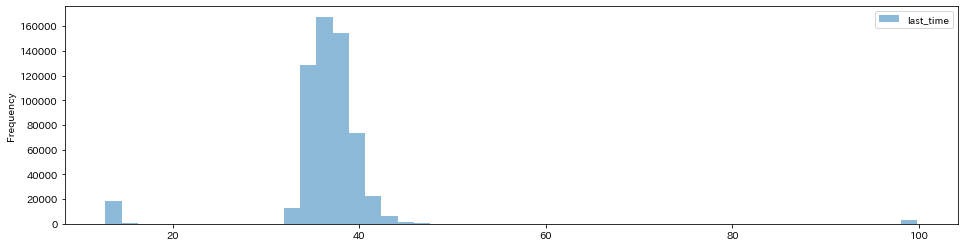

In [69]:
horse_df.plot(kind='hist', y='last_time' , bins=50, figsize=(16,4), alpha=0.5)

In [70]:
horse_df[horse_df['last_time']<20]['race_id'].unique()

array(['200806010604', '200808010508', '200806010208', ...,
       '201907040304', '201907040305', '201907040404'], dtype=object)

In [71]:
race_df[(race_df['race_id']=='200808010804') | (race_df['race_id']=='200806010208') | (race_df['race_id']=='200806010304')]

,race_id,race_round,race_title,weather,ground_status,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,frame_number_second,horse_number_second,frame_number_third,horse_number_third,tansyo,hukusyo_first,hukusyo_second,hukusyo_third,wakuren,umaren,wide_1_2,wide_1_3,wide_2_3,umatan,renhuku3,rentan3,is_obstacle,ground_type,is_left_right_straight,distance,weather_rain,weather_snow
92,200806010208,8,中山新春ジャンプS,晴,1,2008-01-06 13:40:00,中山,14,6,9,5,7,2,2,2550,510,530,220,970,21030,4010,2050,1870,44390,33660,0,1.0,芝,NaN,3200,0,0
203,200808010804,4,障害4歳以上未勝利,曇,4,2008-01-27 11:40:00,京都,14,7,12,1,1,8,13,380,130,110,430,350,340,180,1040,920,860,2020,0,1.0,芝,NaN,2930,0,0
210,200806010304,4,障害4歳以上未勝利,雨,1,2008-01-12 11:20:00,中山,14,3,4,2,2,5,8,2340,330,150,150,2760,3300,880,850,290,8390,2610,0,1.0,芝,NaN,2880,2,0


### odds

In [72]:
horse_df['odds']= horse_df['odds'].astype(float)

### horse dataの保存

In [73]:
print(horse_df.dtypes)
horse_df.head(3)

race_id                       object
rank                          object
frame_number                   int64
horse_number                   int64
horse_id                      object
horse_name                    object
age                            int64
burden_weight                float64
rider_id                      object
goal_time                    float64
half_way_rank                float64
last_time                    float64
odds                         float64
popular                      float64
horse_weight                 float64
tamer_id                      object
owner_id                      object
date                  datetime64[ns]
is_down                        int64
is_senba                       int64
is_mesu                        int64
is_osu                         int64
distance                       int64
avg_velocity                 float64
horse_weight_dif             float64
burden_weight_rate           float64
dtype: object


,race_id,rank,frame_number,horse_number,horse_id,horse_name,age,burden_weight,rider_id,goal_time,half_way_rank,last_time,odds,popular,horse_weight,tamer_id,owner_id,date,is_down,is_senba,is_mesu,is_osu,distance,avg_velocity,horse_weight_dif,burden_weight_rate
0,200808010109,1,8,15,2003106135,レキシントンシチー,5,57.0,666,70.8,1.0,36.1,2.5,1.0,498.0,429,321800,2008-01-05 14:30:00,0,0,0,1,1200,16.949153,2.0,0.114458
1,200808010109,2,2,3,2003103517,カシノエスケイプ,5,55.0,1111,71.1,10.0,35.4,24.0,8.0,502.0,398,514009,2008-01-05 14:30:00,0,0,1,0,1200,16.877637,2.0,0.109562
2,200808010109,3,7,13,2003106389,ナリタジューン,5,55.0,945,71.3,2.0,36.5,4.7,2.0,452.0,1073,712800,2008-01-05 14:30:00,0,0,1,0,1200,16.830295,8.0,0.121681


In [74]:
horse_df.to_csv("csv/cleaned_horse_data.csv", index=False )

In [210]:
tarcoise_race = race_df[race_df['race_title'].str.contains('フューチュリティ')]
tarcoise_horse = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
for i, race in tarcoise_race.iterrows():
    tmp = horse_df[(horse_df['race_id'] == race['race_id']) & (horse_df['rank'] <= 3) ]
    tarcoise_horse = pd.concat([tarcoise_horse, tmp])
# tarcoise_horse['age'].plot(kind='hist')
#     for j, horse in tarcoise_horse.iterrows():
        

In [214]:
tarcoise_horse.head()

,race_id,rank,frame_number,horse_number,horse_id,age,burden_weight,rider_id,goal_time,half_way_rank,last_time,odds,popular,horse_weight,tamer_id,owner_id,date,is_down,is_senba,is_mesu,is_osu,distance,avg_velocity,horse_weight_dif,burden_weight_rate
46937,200806050611,1,2,3,2006106430,2,55.0,5203,95.1,8.333333,35.0,5.4,2.0,514.0,345,23006,2008-12-21 15:25:00,0,0,0,1,1600,16.824395,10.0,0.107004
46938,200806050611,2,6,11,2006102859,2,55.0,5339,95.1,7.666667,35.2,6.2,5.0,450.0,1059,486800,2008-12-21 15:25:00,0,0,0,1,1600,16.824395,6.0,0.122222
46939,200806050611,3,3,5,2006110007,2,55.0,666,95.2,9.666667,35.1,4.3,1.0,446.0,1054,486800,2008-12-21 15:25:00,0,0,0,1,1600,16.806723,10.0,0.123318
96836,200906050611,1,4,8,2007103404,2,55.0,894,94.0,8.000000,34.7,2.3,1.0,446.0,343,226800,2009-12-20 15:25:00,0,0,0,1,1600,17.021277,-4.0,0.123318
96837,200906050611,2,6,12,2007110020,2,55.0,1032,94.2,5.333333,35.2,5.3,2.0,496.0,1066,951005,2009-12-20 15:25:00,0,0,0,1,1600,16.985138,4.0,0.110887


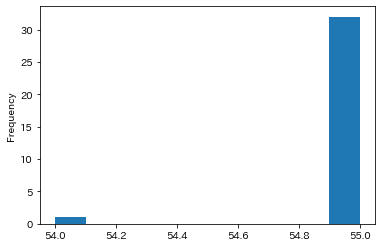

In [212]:
tarcoise_horse.burden_weight.plot(kind='hist')


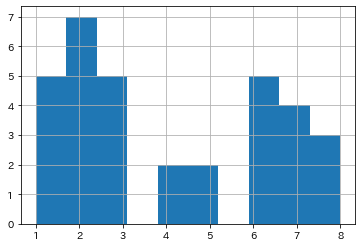

In [218]:
tarcoise_horse.frame_number.hist()

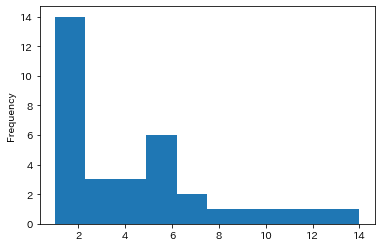

In [213]:
tarcoise_horse.popular.plot(kind='hist')

In [164]:
arima_race = race_df[race_df["race_title"].str.contains('有馬')]
horse_df['rank'] = horse_df['rank'].astype(int)

for i, race in arima_race.iterrows():
    arima_horse = horse_df[(horse_df['race_id'] == race['race_id']) & (horse_df['rank'] <= 3)]
    for j, horse in arima_horse.iterrows():
        print(horse['sex_and_age'], horse['rank'])
    

KeyError: 'sex_and_age'